<a href="https://colab.research.google.com/github/afislonge/campus-recruitment-prediction/blob/main/campus_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

In [277]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [278]:
# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the dataset
train_data.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Data Preprocessing and Exploration

In [279]:
# Checking for missing values
train_data.isnull().sum()


,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [280]:
# Basic statistical analysis
train_data.describe()


,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Exploratory Data Analysis (EDA)

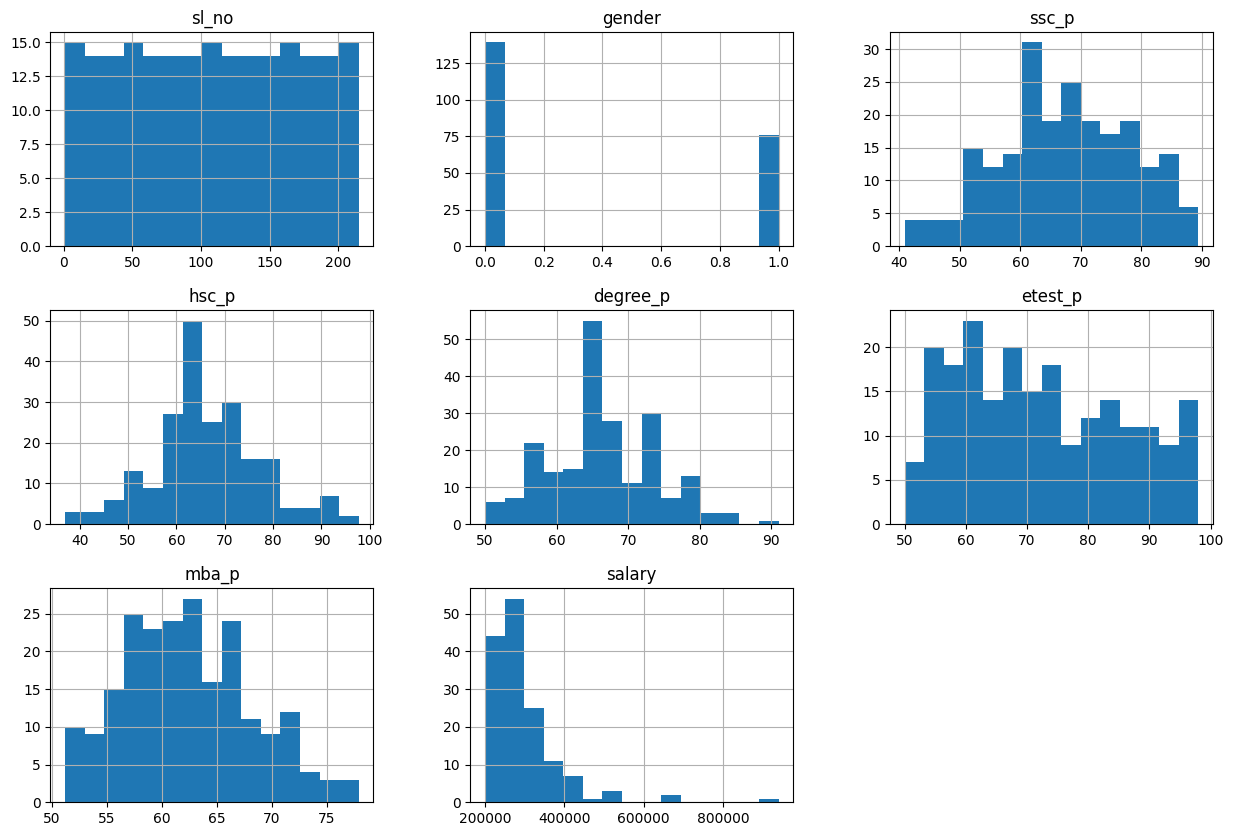

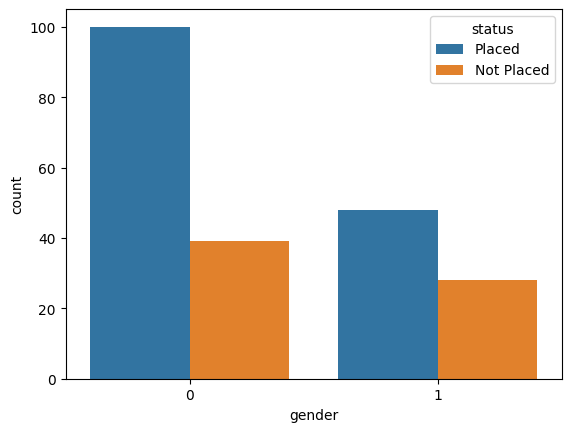

Missing values in each column:
 sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


<ipython-input-281-b6313b6d9c1c>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['salary'].fillna(0, inplace=True)


In [281]:
# Exploratory Data Analysis (EDA)
# Histograms for numerical columns
train_data.hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation Heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
#plt.show()

# Distribution of categorical features
sns.countplot(data=train_data, x='gender', hue='status')
plt.show()

# Checking for missing values in each column
missing_values = train_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Checking for missing values
train_data.isnull().sum()

# Impute missing salary values for 'Not Placed' students with zero
train_data['salary'].fillna(0, inplace=True)


In [282]:
train_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [283]:
train_data['ssc_b'].value_counts()

,count
ssc_b,
Central,116
Others,99


In [284]:
train_data['hsc_b'].value_counts()

,count
hsc_b,
Others,131
Central,84


In [285]:
train_data['hsc_s'].value_counts()

,count
hsc_s,
Commerce,113
Science,91
Arts,11


In [286]:
train_data['degree_t'].value_counts()

,count
degree_t,
Comm&Mgmt,145
Sci&Tech,59
Others,11


In [287]:
train_data['workex'].value_counts()

,count
workex,
No,141
Yes,74


In [288]:
train_data['specialisation'].value_counts()

,count
specialisation,
Mkt&Fin,120
Mkt&HR,95


In [289]:
train_data['status'].value_counts()

,count
status,
Placed,148
Not Placed,67


In [290]:
# Encode the target variable and categorical features
train_data['status'] = train_data['status'].map({'Placed': 1, 'Not Placed': 0})


In [291]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
encoder = LabelEncoder()
for col in ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']:
    train_data[col] = encoder.fit_transform(train_data[col])



In [292]:
train_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,0,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,0,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,1,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [293]:
# describe the dataset after encoding categorical variables
train_data.describe()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,0.353488,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372,198702.325581
std,62.209324,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240,154780.926716
min,1.000000,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000
25%,54.500000,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000
50%,108.000000,0.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000,240000.000000
75%,161.500000,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000,282500.000000
max,215.000000,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


In [294]:
#'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation'
ssc_b_mean  = train_data['ssc_b'].mean()
hsc_b_mean  = train_data['hsc_b'].mean()
hsc_s_mean  = train_data['hsc_s'].mean()
degree_t_mean  = train_data['degree_t'].mean()
workex_mean  = train_data['workex'].mean()
specialisation_mean  = train_data['specialisation'].mean()

In [295]:
print(f"ssc_b mean = {ssc_b_mean}")
print(f"hsc_b mean = {hsc_b_mean}")
print(f"hsc_s mean = {hsc_s_mean}")
print(f"degree_t mean = {degree_t_mean}")
print(f"workex mean = {workex_mean}")
print(f"specialisation mean = {specialisation_mean}")

ssc_b mean = 0.4604651162790698
hsc_b mean = 0.6093023255813953
hsc_s mean = 1.372093023255814
degree_t mean = 0.6
workex mean = 0.34418604651162793
specialisation mean = 0.4418604651162791


In [296]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_data.drop(['status','sl_no'], axis=1)
y = train_data['status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (150, 13)
Testing set shape: (65, 13)


In [297]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0.0
4,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.0
211,0,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.0
212,0,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.0
213,1,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,204000.0


In [298]:
y

,status
0,1
1,1
2,1
3,0
4,1
...,...
210,1
211,1
212,1
213,1


In [299]:
print("Unique classes in y_train:", y_train.unique())


Unique classes in y_train: [0 1]


### Univariate Analysis

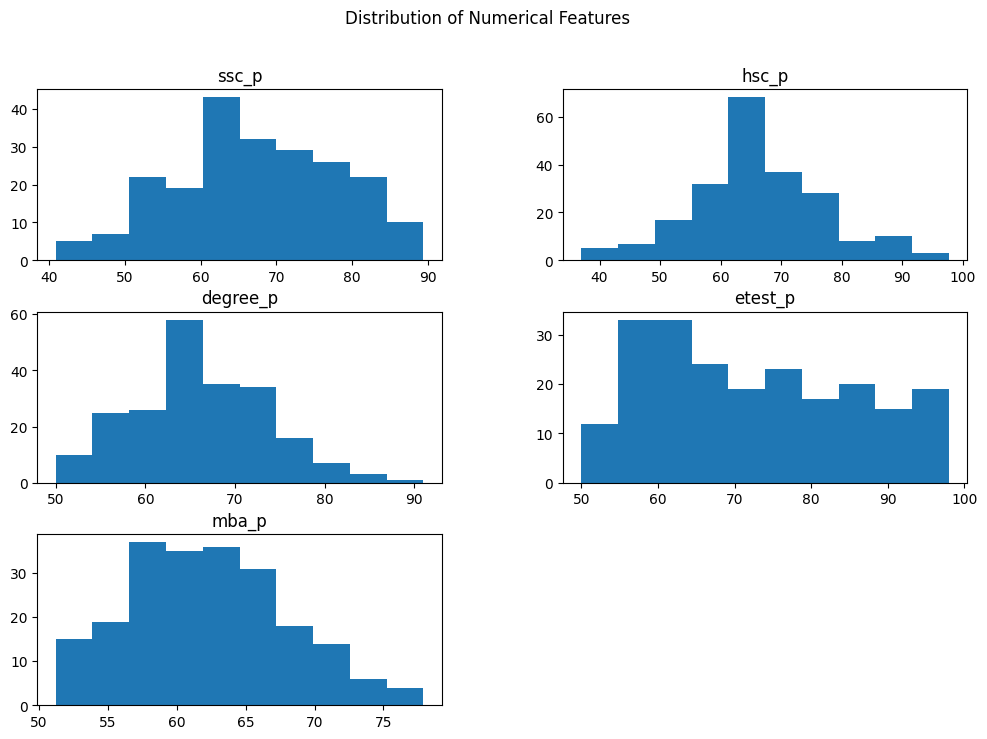

In [300]:
# Plotting histograms for numerical features
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
train_data[numerical_features].hist(bins=10, figsize=(12, 8), grid=False)
plt.suptitle("Distribution of Numerical Features")
plt.show()


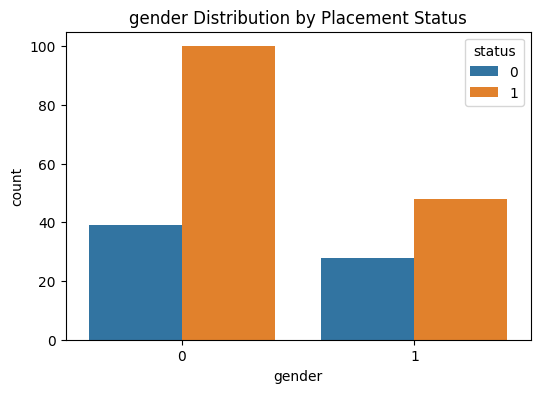

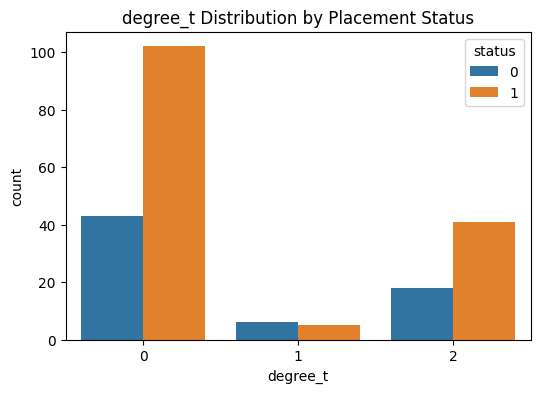

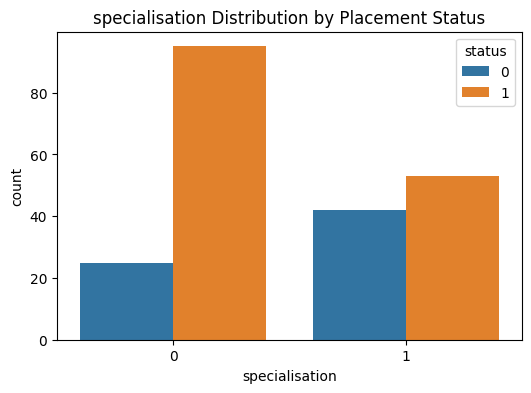

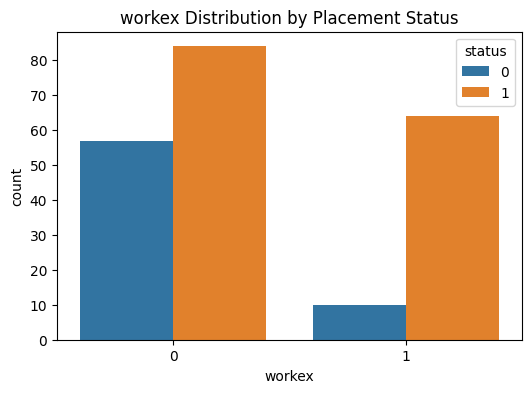

In [301]:
# Visualize the distribution of categorical features and their relationship with placement status
categorical_features = ['gender', 'degree_t', 'specialisation', 'workex']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_data, x=feature, hue='status')
    plt.title(f'{feature} Distribution by Placement Status')
    plt.show()


### Bivariate Analysis

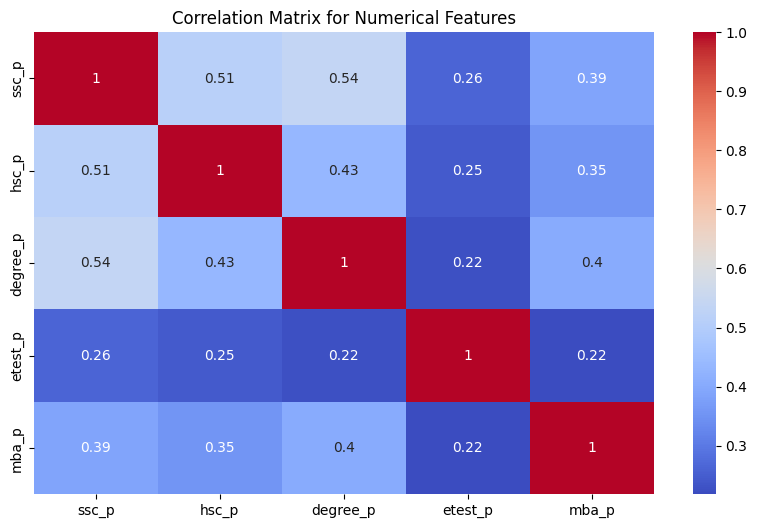

In [302]:
# Calculate correlation matrix for numerical features
correlation_matrix = train_data[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Features")
plt.show()


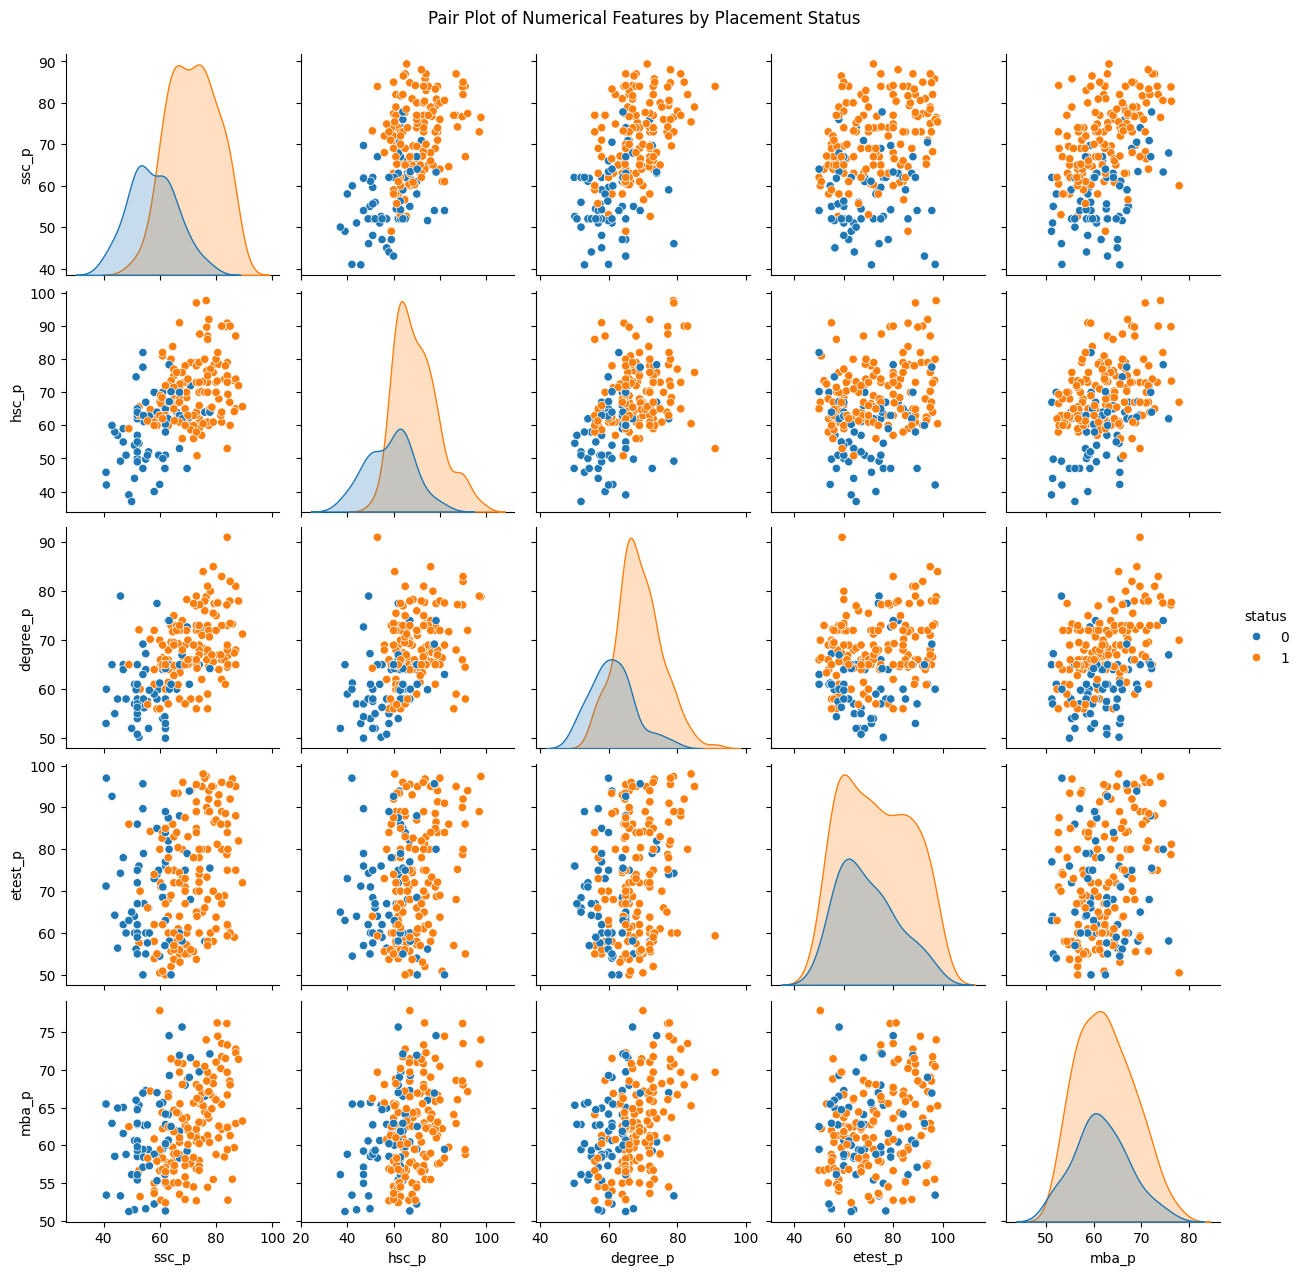

In [303]:
# Pair plot to visualize relationships and potential clusters
sns.pairplot(train_data, hue='status', vars=numerical_features)
plt.suptitle("Pair Plot of Numerical Features by Placement Status", y=1.02)
plt.show()


### Target vs. Feature Analysis

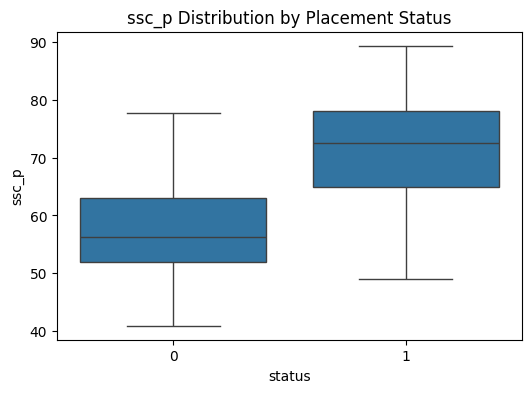

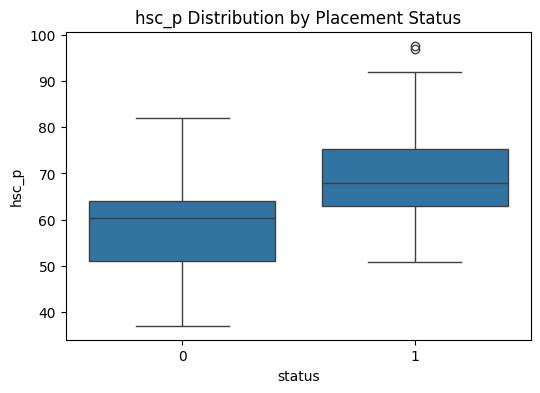

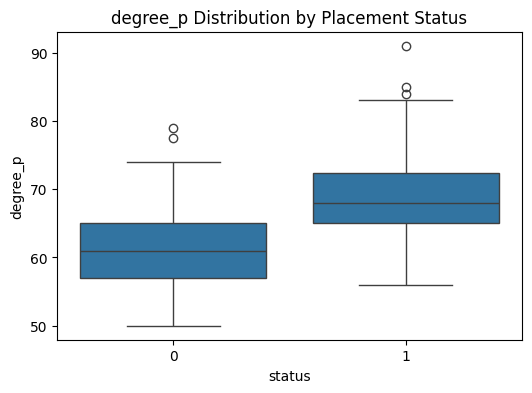

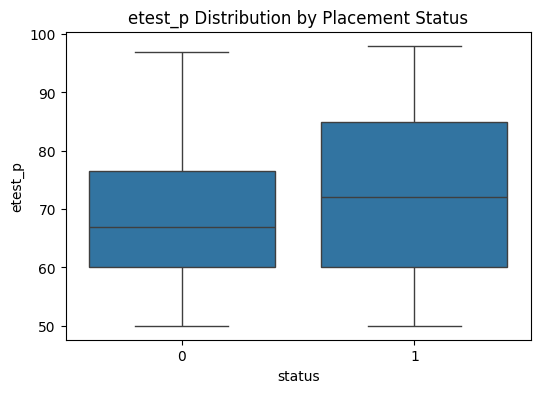

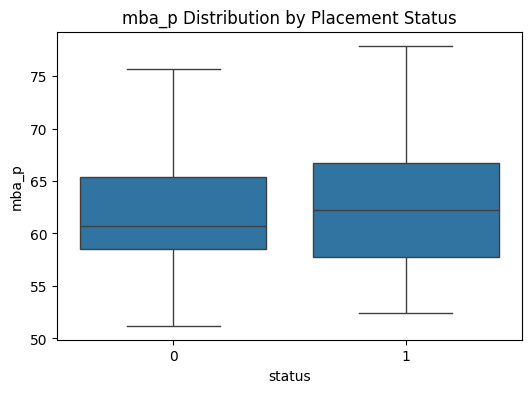

In [304]:
# Box plots to compare distributions of numerical features with placement status
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train_data, x='status', y=feature)
    plt.title(f'{feature} Distribution by Placement Status')
    plt.show()


Analysis of Relationships Among Categorical Variables and Placement Status

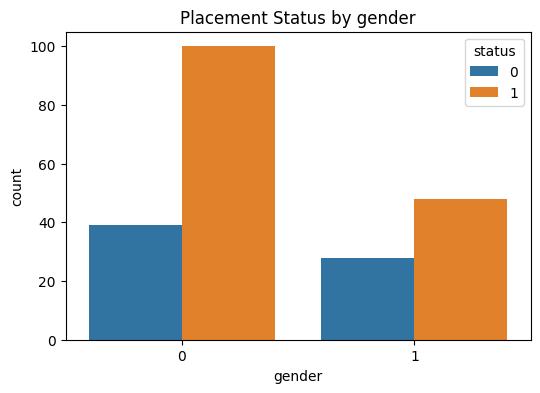

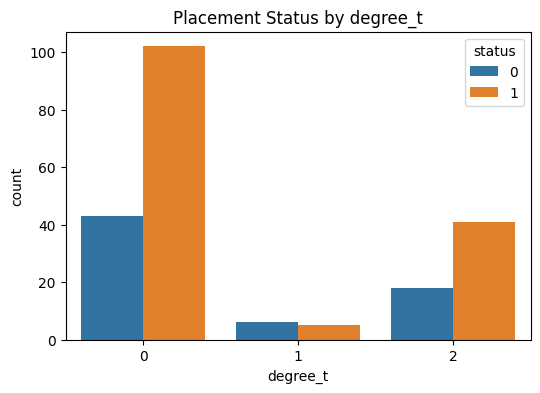

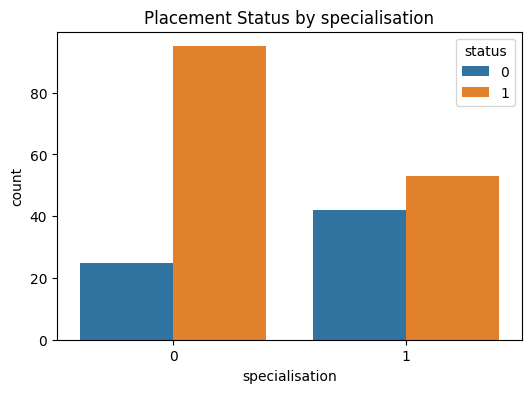

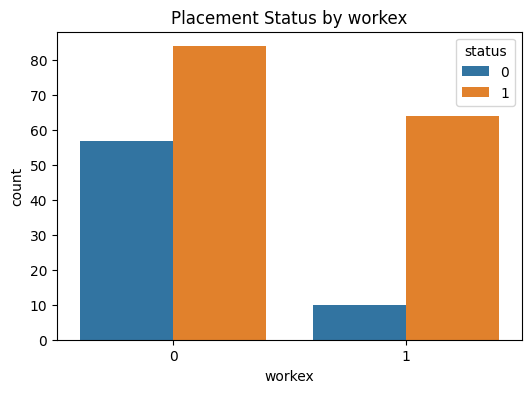

In [305]:
# Using count plots to see the impact of categorical features on placement
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_data, x=feature, hue='status')
    plt.title(f'Placement Status by {feature}')
    plt.show()


### Feature Engineering

In [306]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [307]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))  # save model

### Logistic Regression Hyperparameter Tuning

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
logistic_model = LogisticRegression()

# Define the hyperparameters to tune
logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']  # Optimization algorithms
}

# Set up the GridSearchCV
logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)

# Get the best parameters
best_logistic_params = logistic_grid_search.best_params_
print("Best parameters for Logistic Regression:", best_logistic_params)


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}


### Decision Tree Hyperparameter Tuning

In [309]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt_model = DecisionTreeClassifier()

# Define the hyperparameters to tune
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Set up the GridSearchCV
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

# Get the best parameters
best_dt_params = dt_grid_search.best_params_
print("Best parameters for Decision Tree:", best_dt_params)


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random Forest Hyperparameter Tuning

In [310]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier()

# Define the hyperparameters to tune
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Set up the GridSearchCV
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Get the best parameters
best_rf_params = rf_grid_search.best_params_
print("Best parameters for Random Forest:", best_rf_params)


Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### Model traing and evaluation

Model: Logistic_Regression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


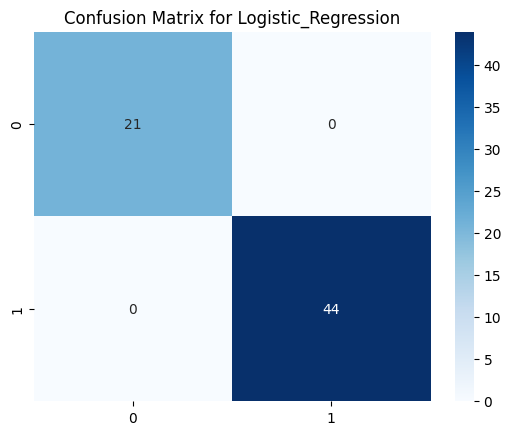

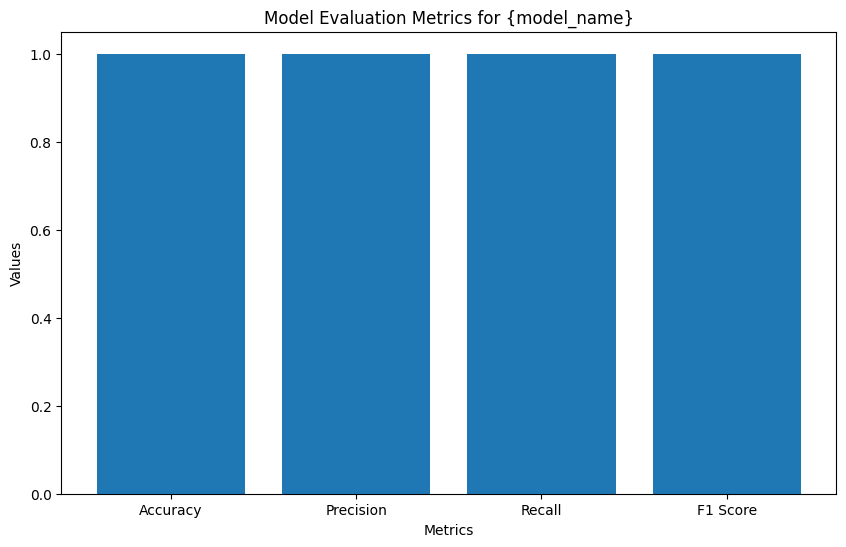



Model: Decision_Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


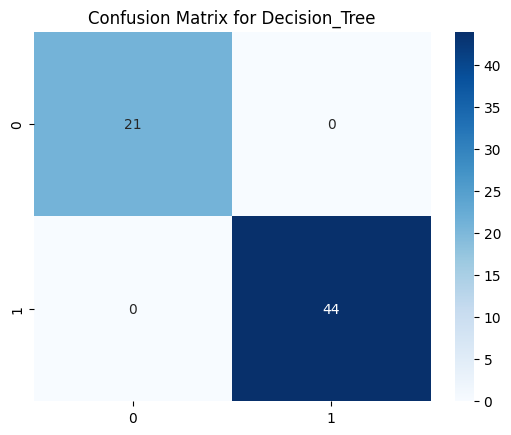

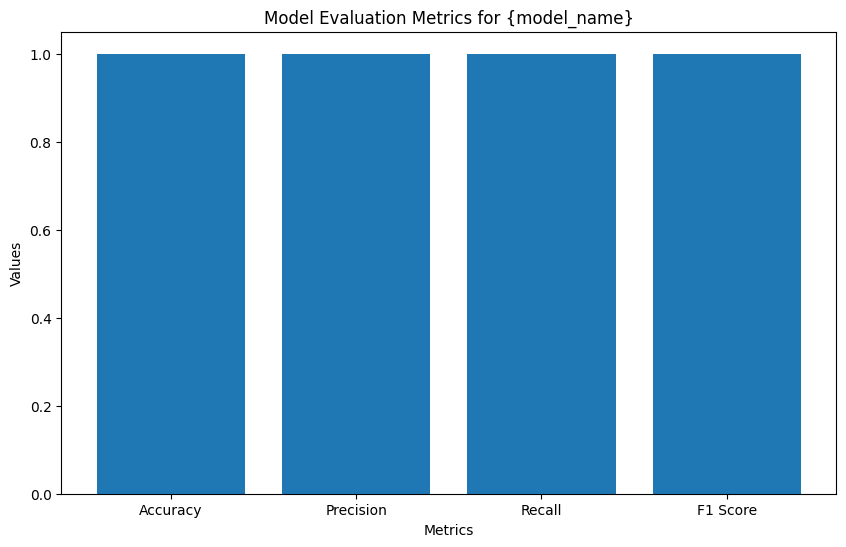



Model: Random_Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


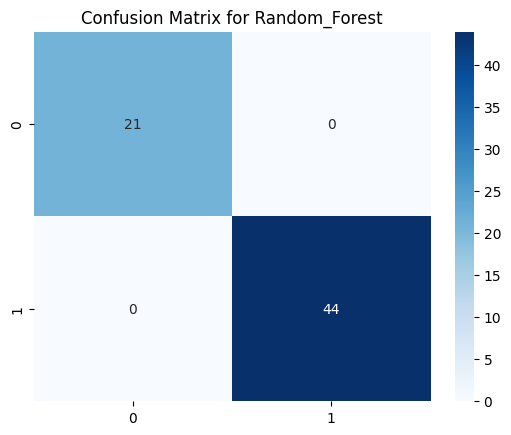

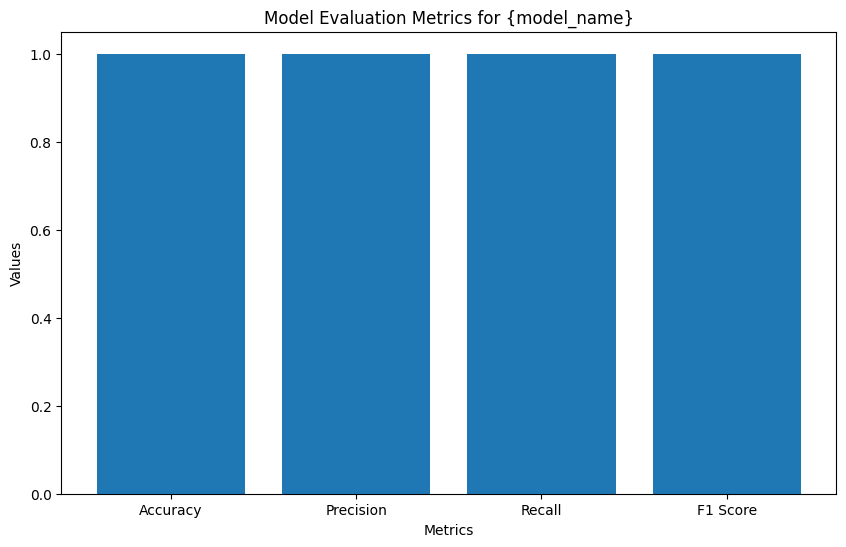

In [311]:
# Initialize models
models = {
    "Logistic_Regression": LogisticRegression(C=1, solver='liblinear'),
    "Decision_Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1),
    "Random_Forest": RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, bootstrap=True)
}

model_save_name = {
    "Logistic_Regression": "log_reg",
    "Decision_Tree": "dt",
    "Random_Forest": "rf"
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pickle.dump(model, open(f'{model_save_name[model_name]}.pkl', 'wb'))  # save model
    y_pred = model.predict(X_test) # Make predictions on the test set
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

    # Plotting confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()
    print(f"\n")
    # Bar plot for evaluation metrics
    # Add some text for labels, title, and custom x-axis tick labels, etc.
    # Add the numeric values on top of the bars
    plt.figure(figsize=(10, 6))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
    plt.bar(metrics, values)
    plt.title('Model Evaluation Metrics for {model_name}')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.show()

    print(f"\n")

### Model Evaluation interpretation

The confusion matrices provided for each model reveal that all three models—Logistic Regression, Decision Tree, and Random Forest—achieved perfect accuracy on the test set, resulting in identical metrics (Accuracy, Precision, Recall, and F1 Score all equal to 1.00). Here’s a breakdown of the confusion matrices and their implications:

Summary of Results
True Negatives (TN): Each model correctly classified 21 students who were not placed.
False Positives (FP): There were no false positives, meaning no student was incorrectly classified as "placed" when they were not.
False Negatives (FN): Each model also correctly identified all students who were actually placed, resulting in no false negatives.
True Positives (TP): All models correctly classified 44 students as "placed."
Insights from the Confusion Matrices
Perfect Classification: Since there are no false positives or false negatives, each model has accurately classified every instance in the test set. This results in a confusion matrix that shows perfect separation between the two classes.

Performance Metrics: With all metrics (accuracy, precision, recall, and F1 score) at 1.00, the models demonstrate an ideal performance on this dataset.

Implications:

While perfect results are typically desirable, it’s important to evaluate whether such results are due to the dataset's nature or an overfitting issue. In real-world applications, achieving perfect scores is rare, and perfect classification might indicate that the dataset was not sufficiently challenging or that the test set may closely resemble the training set.
These results should be treated with caution and ideally validated with additional, potentially unseen data to ensure that the models generalize well and are not overfitting.
Visual Summary: The confusion matrices for all three models are visually identical, with no misclassifications in either category. This demonstrates that the models have consistently high performance across the board for this dataset.

Given these findings, Random Forest and Decision Tree, being more complex models, could offer better generalization for more challenging datasets. Logistic Regression's strong performance here suggests it may be sufficient when simplicity and interpretability are prioritized.

### Voting Classifier with all three models

In [312]:
# Voting Classifier with all three models
voting_clf = VotingClassifier(estimators=[
    ('log_reg', models["Logistic_Regression"]),
    ('dt', models["Decision_Tree"]),
    ('rf', models["Random_Forest"])
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Evaluate Voting Classifier
print("Voting Classifier Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_voting):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_voting):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_voting):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_voting)}")


Voting Classifier Performance
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[21  0]
 [ 0 44]]


In [313]:
pickle.dump(voting_clf, open('voting_clf.pkl', 'wb'))


### Test model with unseen data

In [314]:
# Load the saved models

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('log_reg.pkl', 'rb') as f:
    logistic_model = pickle.load(f)

with open('dt.pkl', 'rb') as f:
    decision_tree_model = pickle.load(f)

with open('rf.pkl', 'rb') as f:
    random_forest_model = pickle.load(f)


In [315]:
# Unseen data
test_data.head()


,sl_no,gender,salary
0,123,1,236000.000000
1,199,1,288655.405405
2,138,0,225000.000000
3,137,1,288655.405405
4,76,1,288655.405405


In [316]:
# Dropping 'sl_no' as it is an identifier, not a feature
unseen_data = test_data.drop(['sl_no','salary'], axis=1)

In [317]:
unseen_data.head()

,gender
0,1
1,1
2,0
3,1
4,1


#### # Fill missing data values with mean values

In [318]:
# Fill missing data values with mean values
# ssc_p	ssc_b	hsc_p	hsc_b	hsc_s	degree_p	degree_t	workex	etest_p	specialisation	mba_p
# gender	ssc_p	ssc_b	hsc_p	hsc_b	hsc_s	degree_p	degree_t	workex	etest_p	specialisation	mba_p	salary

unseen_data['ssc_p'] = train_data['ssc_p'].mean()
unseen_data['ssc_b'] = train_data['ssc_b'].mean()
unseen_data['hsc_p'] = train_data['hsc_p'].mean()
unseen_data['hsc_b'] = train_data['hsc_b'].mean()
unseen_data['hsc_s'] = train_data['hsc_s'].mean()
unseen_data['degree_p'] = train_data['degree_p'].mean()
unseen_data['degree_t'] = train_data['degree_t'].mean()
unseen_data['workex'] = train_data['workex'].mean()
unseen_data['etest_p'] = train_data['etest_p'].mean()
unseen_data['specialisation'] = train_data['specialisation'].mean()
unseen_data['mba_p'] = train_data['mba_p'].mean()
unseen_data['salary'] = test_data['salary']

In [319]:
unseen_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.6,0.344186,72.100558,0.44186,62.278186,236000.000000
1,1,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.6,0.344186,72.100558,0.44186,62.278186,288655.405405
2,0,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.6,0.344186,72.100558,0.44186,62.278186,225000.000000
3,1,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.6,0.344186,72.100558,0.44186,62.278186,288655.405405
4,1,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.6,0.344186,72.100558,0.44186,62.278186,288655.405405


#### Making predictions with each model

In [320]:
# Making predictions with each model
logistic_predictions = logistic_model.predict(unseen_data)
decision_tree_predictions = decision_tree_model.predict(unseen_data)
random_forest_predictions = random_forest_model.predict(unseen_data)

# Compiling the results
unseen_data['log_reg_pred'] = logistic_predictions
unseen_data['dt_pred'] = decision_tree_predictions
unseen_data['rf_pred'] = random_forest_predictions

# Displaying the predictions
print(unseen_data)

    gender      ssc_p     ssc_b      hsc_p     hsc_b     hsc_s   degree_p  \
0        1  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
1        1  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
2        0  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
3        1  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
4        1  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
5        1  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
6        0  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
7        0  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
8        1  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
9        1  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
10       1  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   
11       1  67.303395  0.460465  66.333163  0.609302  1.372093  66.370186   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
